In [7]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

import fakeenvironment as fe

In [20]:
importlib.reload(fe)
e = fe.Environment()
e.add_obstacle((650,850,200,1000))
e.add_obstacle((0,250,600,620))

<Figure size 720x720 with 0 Axes>

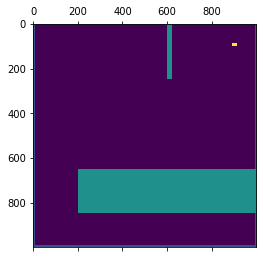

In [21]:
e.plot()

<Figure size 720x720 with 0 Axes>

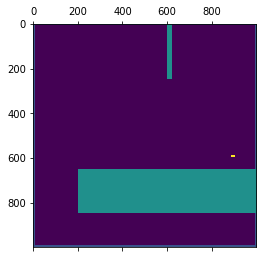

In [23]:
e.action(25, 500)

In [ ]:
a,d = e.distance_sensor()
for an in a:
    line = e.pts_to_anchor(an)[0]
    plt.plot([a for a,b in line], [b for a,b in line])